# Notebook Regresion Lineal 1 Reto: Interlub
Author: A. Ramirez-Morales (andres.ramirez@tec.mx)

Students:

- Gustavo Aguilar
- Luis Carlos Marrufo
- Angel Esparza
- Jose Luis Santos


## Instrucciones:
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Procure NO usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor
- Active el kernel proveniente de `Anaconda`
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Prohibido usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor



In [1]:
# cargar librerías básicas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import pandas as pd

### Motivo 
Imagina que le cliente tiene un sólo valor que quiere cambiar. Por ejemplo viscosidad, para esto nos sirev la RL, pues con ella podemos conocer el resto de valores que el cliente necesito, y por ende la grasa.  


# 0. Datos disponibles

 Cargar los datos como pandas data frame

In [2]:
df = pd.read_csv("../../datos/datos_grasas_Tec_limpio.csv") # Ya se cambiaron unas cosas manuales

Dele un vistazo a los datos (tambien abralos en excel)

In [3]:
def glimpse(df):
    """
    completar documentacion
    """
    print("Data Types:")
    print(df.dtypes)
    print("\nShape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())

glimpse (df)

Data Types:
idDatosGrasas                                 int64
codigoGrasa                                  object
Aceite Base                                  object
Espesante                                    object
Grado NLGI Consistencia                     float64
Viscosidad del Aceite Base a 40°C. cSt      float64
Penetración de Cono a 25°C, 0.1mm           float64
Punto de Gota, °C                             int64
Estabilidad Mecánica, %                     float64
Punto de Soldadura Cuatro Bolas, kgf        float64
Desgaste Cuatro Bolas, mm                   float64
Indice de Carga-Desgaste                    float64
Carga Timken Ok, lb                         float64
Resistencia al Lavado por Agua a 80°C, %    float64
Corrosión al Cobre                           object
Registro NSF                                float64
Factor de Velocidad                         float64
Temperatura de Servicio °C, min               int64
Temperatura de Servicio °C, max               int64


## 1. Procesamiento de datos

### 1.1. Quitar columnas que no necesitamos

In [4]:
df_reduced = df.drop(columns= ["codigoGrasa", "Corrosión al Cobre", "Registro NSF", "categoria", "subtitulo", "aplicaciones", "Indice de Carga-Desgaste", "beneficios"])

### Justificar el por qué nos deshacemos de una columna 
- Motivo por qué eliminar "codigoGrasa": 
- Motivo por qué eliminar  "Corrosión al Cobre": tiene pocos datos  
- Motivo por qué eliminar "Registro NSF": 
- Motivo por qué eliminar "aplicaciones": 
- Motivo por qué eliminar "subtitulo"": 
- Motivo por qué eliminar "codigoGrasa": 
- Motivo por qué eliminar "codigoGrasa": 
- Motivo por qué eliminar "codigoGrasa": 


### 1.2. Definir una funcion para mapear las variables categoricas
*Ejercicio*: Complete la función de tal manera que genere etiquetas del 0 a $n$ (donde $n$) es el numero de diferentes variables

In [5]:
def mapear (variables): 

    for var in variables: 
        i = 0
        columna = df_reduced[var]
        for name in columna.unique():
            if name is np.nan:
                rep = -99
            else:
                rep = i
                i+=1
            df_reduced[var] = df_reduced[var].replace(name, rep)


# color, textura, espesnate 

In [6]:
mapear(["Aceite Base", "Espesante", "color", "textura"])

/var/folders/ys/2psfql1156jf72wjlnnt4vvc0000gn/T/ipykernel_9021/680639923.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reduced[var] = df_reduced[var].replace(name, rep)


In [7]:
df_reduced["Espesante"]

0      0
1      0
2      0
3      0
4      1
5      1
6      2
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15   -99
16     2
17     3
18     3
19     4
20     2
21     2
22     2
23     2
24   -99
25   -99
26     0
27     0
28     0
29     1
30     1
31     1
32     1
33     5
34     5
35     5
36     5
37     5
38     5
39     0
40     0
41     0
42     4
43     4
44     4
45     4
46   -99
47   -99
48   -99
49     6
50     6
Name: Espesante, dtype: int64

### 1.3 Pasos finales
- Llenar de -99 donde no hayan registros
- Guardar en archivo csv


In [8]:
df_reduced = df_reduced.fillna(-99)
df_reduced.to_csv("../../datos/transformed_data_interlub.csv")

### Modificación manual 
- en los símbolos < >, se hizo +- 1 
- para rangos, se sacó el promedio
- para nan, usamos -99

# 2. Generar datos
*Ejercicio:* comprenda, complete y documente la siguiente funcion, el profesor le va apoyar

In [9]:
def simular_datos(df_original, n_nuevos=50):
    """
    completar documentacion
    esta funcion esta incompleta, completar las lineas
    """
    nuevos_datos = []
    
    for i in range(n_nuevos):
        # seleccionar una grasa base aleatoria
        grasa_base = df_original.iloc[np.random.randint(0, len(df_original))]
        
        nuevo_id = len(df_original) + i
        
        # nuevo grasa con variaciones controladas
        nuevo_registro = {}
        
        for col in df_original.columns: # iteramos sobre cada columna
            if col == '':  # mandamos a volar el indice (obvio)
                continue
                
            valor_base = grasa_base[col]
            
            # si -99, lo seguimos manteniendo como missing (esto lo podemos cambiar)
            if valor_base == -99:
                nuevo_registro[col] = -99
            else:
                # variacion segun el tipo de variable
                if col in ['Aceite Base', 'Espesante', 'color', 'textura']:
                    # variables categoricas, las dejamos igual... por el momento
                    nuevo_registro[col] = valor_base
                elif col in ['Grado NLGI Consistencia']:
                    # NLGI posibles valores
                    nlgi_opciones = [0, 1, 1.5, 2, 2.5, 3]
                    nuevo_registro[col] = np.random.choice(nlgi_opciones)
                elif col in ['Viscosidad del Aceite Base a 40°C. cSt']:
                    # viscosidad con variacion de 15% (esto puede cambiar)
                    nuevo_registro[col] = max(40, valor_base * np.random.uniform(0.85, 1.15)) #40 es el mínimo. Si el resultado es <40, se toma 40. 
                elif col in ['Penetración de Cono a 25°C, 0.1mm']:
                    # Penetración con variación 5%
                    nuevo_registro[col] = max(200, min(500, valor_base * np.random.uniform(0.95, 1.05))) #200 es el mínimo
                elif col in ['Punto de Gota, °C']:
                    # Punto de gota con variación 3%
                    nuevo_registro[col] = max(100, valor_base * np.random.uniform(0.97, 1.03))

                # completar el codigo desde aqui. Agregar el resto de variables numéricas
                # 8 variables numéricas más. 
                elif col in ['Punto de Soldadura Cuatro Bolas, kgf']:
                    # Punto de soldadura con variación 8%
                    min_val = df_original[col][df_original[col] != -99].min()
                    nuevo_registro[col] = max(min_val, valor_base * np.random.uniform(0.92, 1.08))
                elif col in ['Desgaste Cuatro Bolas, mm ']:
                    # Desgaste con variación 10% (menor variación por ser medida crítica)
                    min_val = df_original[col][df_original[col] != -99].min()
                    nuevo_registro[col] = max(min_val, valor_base * np.random.uniform(0.90, 1.10))
                elif col in ['Factor de Velocidad']:
                    # Factor de velocidad con variación 5%
                    min_val = df_original[col][df_original[col] != -99].min()
                    nuevo_registro[col] = max(min_val, valor_base * np.random.uniform(0.95, 1.05))
                elif col in ['Temperatura de Servicio °C, min']:
                    # Temperatura mínima con variación 10%
                    # Aquí no aplicamos max() porque puede ser negativa
                    nuevo_registro[col] = valor_base * np.random.uniform(0.90, 1.10)
                elif col in ['Temperatura de Servicio °C, max']:
                    # Temperatura máxima con variación 5%
                    min_val = df_original[col][df_original[col] != -99].min()
                    nuevo_registro[col] = max(min_val, valor_base * np.random.uniform(0.95, 1.05))
                elif col in ['Estabilidad Mecánica, %']:
                    # Estabilidad mecánica con variación 8%, limitada entre 0 y 15
                    nuevo_registro[col] = max(0, min(15, valor_base * np.random.uniform(0.92, 1.08)))
                elif col in ['Carga Timken Ok, lb']:
                    # Carga Timken con variación 7%
                    min_val = df_original[col][df_original[col] != -99].min()
                    nuevo_registro[col] = max(min_val, valor_base * np.random.uniform(0.93, 1.07))
                elif col in ['Resistencia al Lavado por Agua a 80°C, %']:
                    # Resistencia al agua con variación 5%, limitada entre 0 y 100
                    nuevo_registro[col] = max(0, min(100, valor_base * np.random.uniform(0.95, 1.05)))
                # aqui termina su participacion en este codigo y la vie ;)
                
                elif col in ['Registro NSF']:
                    # algunos como -99 (faltantes)
                    if np.random.random() < 0.7:
                        nuevo_registro[col] = -99
                    else:
                        nuevo_registro[col] = np.random.uniform(100000, 200000)
                else:
                    nuevo_registro[col] = valor_base
        
        nuevos_datos.append(nuevo_registro)
    
    return pd.DataFrame(nuevos_datos)

In [10]:
df_reduced

,idDatosGrasas,Aceite Base,Espesante,Grado NLGI Consistencia,Viscosidad del Aceite Base a 40°C. cSt,"Penetración de Cono a 25°C, 0.1mm","Punto de Gota, °C","Estabilidad Mecánica, %","Punto de Soldadura Cuatro Bolas, kgf","Desgaste Cuatro Bolas, mm","Carga Timken Ok, lb","Resistencia al Lavado por Agua a 80°C, %",Factor de Velocidad,"Temperatura de Servicio °C, min","Temperatura de Servicio °C, max",descripcion,color,textura
0,1,0,0,2.0,680.0,279.0,304,1.07,500.0,-99.00,60.0,0.58,200000.0,5,220,El producto es grasa lubricante de servicio pe...,0,0
1,2,1,0,1.5,460.0,300.0,304,2.60,900.0,0.50,70.0,3.00,300000.0,-30,150,El producto es una grasa lubricante de gran ad...,1,1
2,3,1,0,2.0,460.0,280.0,300,10.00,500.0,0.48,-99.0,3.00,-99.0,-10,150,El producto es una grasa lubricante de gran ad...,1,1
3,4,1,0,2.0,220.0,281.0,300,5.00,500.0,0.45,-99.0,3.00,-99.0,-15,150,El producto es una grasa lubricante elaborada ...,2,0
4,5,1,1,1.5,680.0,295.0,260,6.50,620.0,0.48,50.0,1.45,-99.0,-5,150,El producto es un grasa lubricante con propied...,1,1
5,6,1,1,2.0,680.0,275.0,260,6.50,620.0,0.48,50.0,1.45,-99.0,-5,150,El producto es un grasa lubricante con propied...,1,1
6,7,1,2,1.0,3800.0,320.0,280,-99.00,500.0,-99.00,40.0,-99.00,-99.0,-5,120,El producto es una grasa especial para engrana...,1,1
7,8,1,0,0.0,800.0,370.0,304,1.60,900.0,0.50,70.0,-99.00,300000.0,-30,150,El producto es una grasa lubricante de gran ad...,1,1
8,9,1,0,1.0,800.0,312.0,304,1.60,900.0,0.50,70.0,3.00,300000.0,-30,150,El producto es una grasa lubricante de gran ad...,1,1
9,10,1,0,1.5,800.0,300.0,304,2.60,900.0,0.50,70.0,3.00,300000.0,-30,150,El producto es una grasa lubricante de gran ad...,1,1


### 2.1 Llamar a la funcion 

In [11]:
df_reduced_numer = simular_datos(df_reduced, n_nuevos=500)

expanded_data = pd.concat([df_reduced, df_reduced_numer], ignore_index=True)
glimpse(expanded_data)

expanded_data.to_csv("../../datos/expanded_data_student.csv", index=False)

Data Types:
idDatosGrasas                                 int64
Aceite Base                                   int64
Espesante                                     int64
Grado NLGI Consistencia                     float64
Viscosidad del Aceite Base a 40°C. cSt      float64
Penetración de Cono a 25°C, 0.1mm           float64
Punto de Gota, °C                           float64
Estabilidad Mecánica, %                     float64
Punto de Soldadura Cuatro Bolas, kgf        float64
Desgaste Cuatro Bolas, mm                   float64
Carga Timken Ok, lb                         float64
Resistencia al Lavado por Agua a 80°C, %    float64
Factor de Velocidad                         float64
Temperatura de Servicio °C, min             float64
Temperatura de Servicio °C, max             float64
descripcion                                  object
color                                         int64
textura                                       int64
dtype: object

Shape: (551, 18)

First few rows:
   

# 3. Regresión lineal

### 3.1 Variables en el modelo (y, X)


In [12]:
def variables_regresion(df, variable_objetivo, variables_predictoras):
    """
    completar documentacion
    """
    
    # quedarnos solo con las filas completas
    df_filtrado = df.copy()
    for var in variables_predictoras + [variable_objetivo]:
        df_filtrado = df_filtrado[df_filtrado[var] != -99]
    
    X = df_filtrado[variables_predictoras]
    y = df_filtrado[variable_objetivo]
    
    return X, y

### 3.2 Definir el modelo

*Ejercicio:* complete y comente las siguientes lineas de codigo

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

expanded_data= pd.read_csv ("../../datos/expanded_data.csv")
# definir variable objetivo
variable_objetivo ='Temperatura de Servicio °C, max'

# definir variables predictoras
variables_predictoras = ['Viscosidad del Aceite Base a 40°C. cSt', 'Penetración de Cono a 25°C, 0.1mm', 'Punto de Gota, °C', 'Punto de Soldadura Cuatro Bolas, kgf', 'Grado NLGI Consistencia']
 

X, y= variables_regresion(expanded_data, variable_objetivo, variables_predictoras)

test_size = 100

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=100, random_state=42
)

    
#agregar comentarios

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)
    
y_pred_train = modelo.predict(X_train_scaled)
y_pred_test = modelo.predict(X_test_scaled)
    
# metricas
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# agregar R cuadrada

### 3.2 Grafica de resultados

*Ejercicio:* analice e interprete la grafica resultante

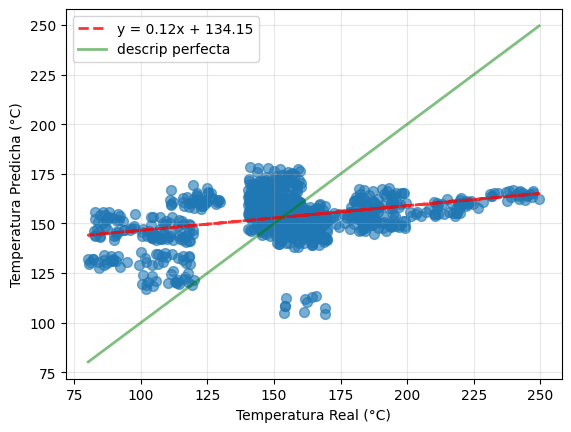

In [14]:
# graficar
y_pred = y_pred_train
y_real = y_train
    
# linea de regresión para las predicciones
z = np.polyfit(y_real, y_pred, 1)
p = np.poly1d(z)
    
plt.scatter(y_real, y_pred, alpha=0.6, s=50)
plt.plot(y_real, p(y_real), "r--", alpha=0.8, linewidth=2, 
             label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
    
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 
             'g-', alpha=0.5, linewidth=2, label='descrip perfecta')
    
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Ejercicios

- Para la simulacion, intente distintas variaciones de sus datos simulados, dé una variacion informada (educada)
- Para la regresion lineal, pruebe varias combinaciones de variables objetivos
- Haga una regresion linea con las mismas variables, pero solo usando datos originales (sin simulacion)
- Compare sus resultados de los dos puntos anteriores
- Esta es el primer contacto de como simular datos apartir de una base de datos chica, vaya pensando como puede mejorar esta simulacion

In [22]:
df_simulacion_20 = simular_datos(df_reduced, n_nuevos=500)
#glimpse(df_simulacion_20)

In [23]:
#Regresión lineal con otra variable objetivo
variable_objetivo_alt = 'Punto de Gota, °C'
variables_predictoras_alt = ['Viscosidad del Aceite Base a 40°C. cSt', 'Penetración de Cono a 25°C, 0.1mm']
X_alt, y_alt = variables_regresion(expanded_data, variable_objetivo_alt, variables_predictoras_alt)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y_alt, test_size=50, random_state=42)
scaler_alt = StandardScaler()
X_train_alt_scaled = scaler_alt.fit_transform(X_train_alt)
X_test_alt_scaled = scaler_alt.transform(X_test_alt)

modelo_alt = LinearRegression()
modelo_alt.fit(X_train_alt_scaled, y_train_alt)
y_pred_alt = modelo_alt.predict(X_test_alt_scaled)

print("MSE:", mean_squared_error(y_test_alt, y_pred_alt))
print("R2:", r2_score(y_test_alt, y_pred_alt))

MSE: 946.4211191703379
R2: -0.023810469989204996


In [24]:
#Regresión solo con datos originales (sin simulación)
X_orig, y_orig = variables_regresion(df_reduced, variable_objetivo, variables_predictoras)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=20, random_state=42)
scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

modelo_orig = LinearRegression()
modelo_orig.fit(X_train_orig_scaled, y_train_orig)
y_pred_orig = modelo_orig.predict(X_test_orig_scaled)

print("MSE original:", mean_squared_error(y_test_orig, y_pred_orig))
print("R2 original:", r2_score(y_test_orig, y_pred_orig))

MSE original: 1578.574229263784
R2 original: -0.9280295929939346


In [25]:
#Comparación rápida de resultados
print("MSE simulados:", mse_test)
print("R2 simulados:", r2_score(y_test, y_pred_test))
print("MSE originales:", mean_squared_error(y_test_orig, y_pred_orig))
print("R2 originales:", r2_score(y_test_orig, y_pred_orig))

MSE simulados: 983.031692434052
R2 simulados: 0.09998449442529656
MSE originales: 1578.574229263784
R2 originales: -0.9280295929939346


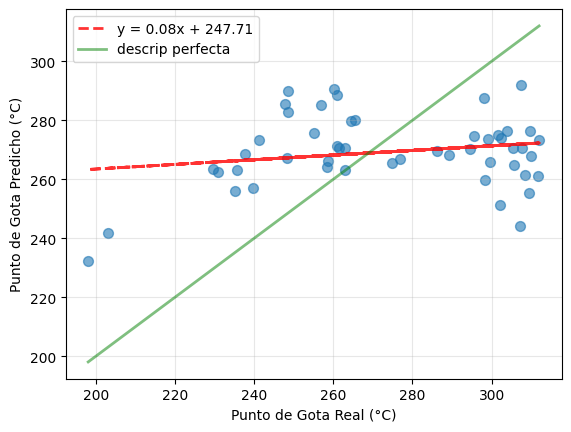

In [28]:
# Graficar regresión alternativa
y_pred = y_pred_alt
y_real = y_test_alt

z = np.polyfit(y_real, y_pred, 1)
p = np.poly1d(z)

plt.scatter(y_real, y_pred, alpha=0.6, s=50)
plt.plot(y_real, p(y_real), "r--", alpha=0.8, linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'g-', alpha=0.5, linewidth=2, label='descrip perfecta')
plt.xlabel('Punto de Gota Real (°C)')
plt.ylabel('Punto de Gota Predicho (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

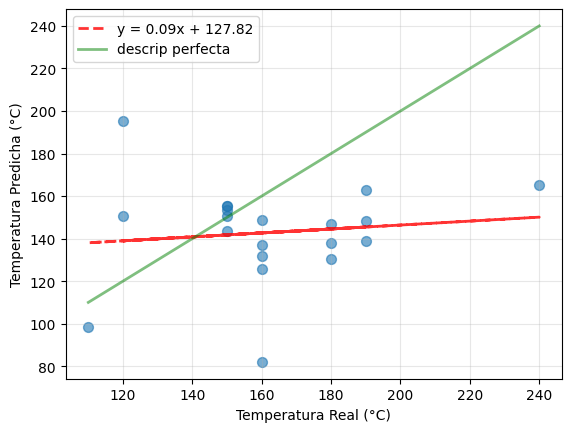

In [29]:
# Graficar regresión con datos originales
y_pred = y_pred_orig
y_real = y_test_orig

z = np.polyfit(y_real, y_pred, 1)
p = np.poly1d(z)

plt.scatter(y_real, y_pred, alpha=0.6, s=50)
plt.plot(y_real, p(y_real), "r--", alpha=0.8, linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'g-', alpha=0.5, linewidth=2, label='descrip perfecta')
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()